# Churn Buster: Exploratory Data Analysis

---

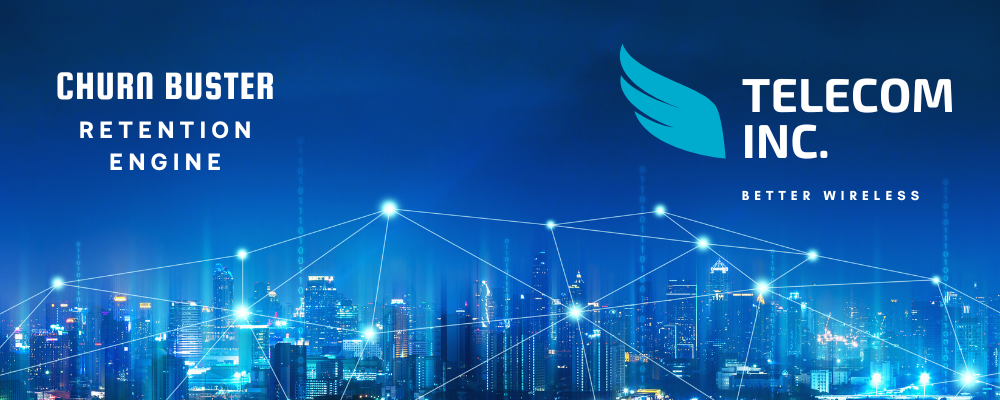

### Overview

This project focuses on a ficticious software company, Churn Buster, that is pitching their tool to Telecom Inc., a ficticious wireless service company. Churn Buster has built a predictive model to reduce Telecom Inc.'s customer churn. To build the model, Churn Buster analyzed 3,333 Telecom Inc. customer accounts. Churn Buster analyzed several models before choosing the model that produced the desired result. The winning model was random forrest comprised of 100 decision trees. The winning model produced an F1 score of 0.80 which significantly improved upon a baseline model's score of 0.25. The model would help Telecom Inc. predict which customers are likely to churn so they could intervene to save the account with discounts and customer support.

### Business Problem

Telecom Inc., an American telecomunications company, is competing with a an up-start company, Lightning Wireless, that has eaten into their majority market share in recent years. To re-gain their market share, Telecom Inc. must first address the issue of customer churn. Telecom Inc. needs a model to help them predict which of customers are likely to churn to they can intervene and save the accounts. They also want to know what factors contribute to churn so they can improve their service to prevent future churn.

To address these business challenges, Churn Buster will sell Telecom Inc. a model that helps predict customer churn. 
To evaluate the preformance of this model, Churn Buster will use F1 score because the Telecom Inc. wants to  capture true positives but is also concerned about minimizing false negatives and false positives. False positives are costly because in cases where our model predicts a customer will churn, Telecom Inc. intends to intervene with customer support and discounts. These interventions cost money, $53K per year salary for support representatives and discounts subrtract from the profitability of each customer they're offered to.

Given their business goals class imbalence of the data (0.81 majority class), F1 score does a better job evaluating the true performance of our model.

### Data

The data for this project was sourced from <a href="https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset">a generic telecom churn dataset</a> containing 3,333 customer records. Each observation corresponds to a unique customer and is associated with 20 columns of of information about their customer (e.g. voicemail plan, daytime minutes) including whether or not the customer churned (our target). The data contains phone numbers from the San Fransisco bay area associated with customers evenly spread out accross 50 U.S. states. There is no indication of when this data was collected.

### Exploratory Data Analysis
1. Inital observations
2. Find missing values
3. Categorize value types
4. Shape of dataset
5. Identify relationships in data
6. Locate any outliers
7. Visualizations

### 1. Initial Observations
- We have 3333 total entries which corresponds to the same number of unique customers
- We have 21 columns of data, all of which seem like they could be relevant to the target other than "phone number"
- We do have more states than area codes which is strange. My assumption as that these area codes are given to customers when they sign up for a plan but remain the same even if they move out of state.
- The data-set is limited to customers with area codes from the San Fransisco Bay area 

In [4]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("Data/churn-in-telecoms-dataset.csv")

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#Create a dict to change string values into bool
binary_dict = {"yes":True,"no":False}
#Change string values into bool
df['international plan'] = df['international plan'].map(binary_dict)
df['voice mail plan'] = df['voice mail plan'].map(binary_dict)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   bool   
 5   voice mail plan         3333 non-null   bool   
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 2. Find missing values
- We have no missing values

In [9]:
#We have no null values to contend with
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 3. Categorize value types
- Each row corresponds to a unique customer, we can think of our index as a unique identifier.

- Categorical columns requiring dummy classification: 
        ['state', 'area code', 'international plan','voice mail plan']
- Valid numeric columns: 
        ['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']
- Continuous numeric columns: 
        ['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge']

In [10]:
print(f'Unqique phone number: {len(df["phone number"].unique())}' )
print(f'Unique area codes: {len(df["area code"].unique())}' )
print(f'Unique states: {len(df["state"].unique())}' )
print(f'Unique int plan values: {len(df["international plan"].unique())}' )
print(f'Unique voice mail plan values: {len(df["voice mail plan"].unique())}' )
print(f'Unique number vmail messages values: {len(df["number vmail messages"].unique())}' )

Unqique phone number: 3333
Unique area codes: 3
Unique states: 51
Unique int plan values: 2
Unique voice mail plan values: 2
Unique number vmail messages values: 46


In [11]:
df_categorical = df[['state', 'area code', 'international plan','voice mail plan']]
df_categorical['churn'] = df[['churn']]

<ipython-input-11-30790cb6cfd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['churn'] = df[['churn']]


In [12]:
df_numeric = df.select_dtypes(include=["int64","float64"]).drop(columns=["area code"])
df_numeric['churn'] = df[['churn']]

In [13]:
df.select_dtypes(include="float").columns

Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')

In [14]:
#Our categorical values look clean.
#We do have more states than area codes which is strange. My assumption as that these area codes are given to customers when
#they sign up for a plan but remain the same even if they move out of state.
df_categorical.value_counts()

state  area code  international plan  voice mail plan  churn
WV     415        False               False            False    36
NY     415        False               False            False    27
MN     415        False               False            False    25
AL     415        False               False            False    25
OR     415        False               False            False    25
                                                                ..
UT     510        False               True             True      1
MT     510        False               True             True      1
                  True                True             False     1
ID     415        False               True             True      1
NV     510        True                False            True      1
Length: 691, dtype: int64

### 4. Shape of dataset
- Our target variable "churn" is imbalanced with 85% of values equal to "False"
- Number of vmail messages is normally distributed except for a clustering at 0. Accounts without a vmail plan have no voicemal messages.

In [15]:
#Our target variable "churn" is imbalanced. We will need to address this with SMOTE later on.
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [16]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

#### Exploring shape of numeric values

- `Number of vmail messages` is normally distributed except for a clustering at 0.
- `Total intl calls` has a right tail, there are a small number of customers who make many more international calls than average
- `customer service calls` has a right tail, there are a small number of customers who make many more customer service calls than average

#### Exploring shape of categorical values

- `state` I would expect more populus states to be more represented but that's not what we see. Distribution is pretty evenly divided amongst all U.S. states suggesting this data represents a sample selected to purposefully include all states more or less equally. 
- `area code` distrobution is split 50%, 25%, 25% between 415, 510, and 408 area codes in the SF bay area
- 10% of customers have `international plan` 
- Users with no international plan are nonetheless able to make international calls
- 28% of customers have `voice mail plan`
- Users with no voice mail plan are not able to recieve voice mails thus have zero voicemails

In [17]:
df_categorical.columns

Index(['state', 'area code', 'international plan', 'voice mail plan', 'churn'], dtype='object')

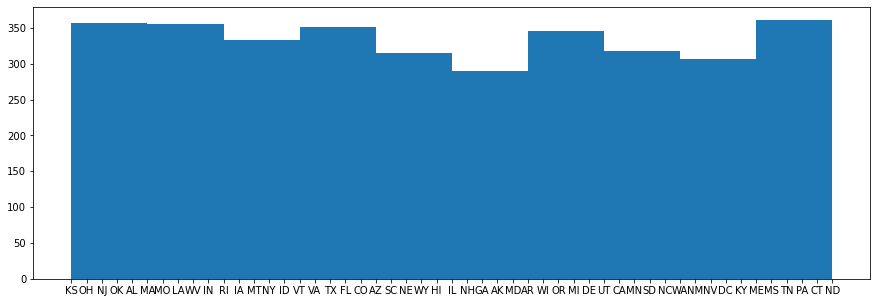

In [35]:
#This seems to be a sample that intentionally included users in all states in roughly equal proportions
fig, ax=plt.subplots(figsize=(15, 5))
ax.hist(df_categorical['state']);

In [19]:
#Three unique area codes, each near San Fransisco
df['area code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64

In [20]:
df['international plan'].value_counts(normalize=True)

False    0.90309
True     0.09691
Name: international plan, dtype: float64

In [21]:
df['voice mail plan'].value_counts(normalize=True)

False    0.723372
True     0.276628
Name: voice mail plan, dtype: float64

In [22]:
#Users with no voice mail plan are not able to recieve voice mails thus have zero voicemails
df[df["voice mail plan"] == False]['number vmail messages'].describe()

count    2411.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: number vmail messages, dtype: float64

In [23]:
#Users with no international plan are nonetheless able to make international calls
df[df["international plan"] == False]["total intl minutes"].describe()

count    3010.000000
mean       10.195349
std         2.798937
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: total intl minutes, dtype: float64

### 5. Identify relationships in data
- There is no significant co-linearity between any of our possible features
- Values that seem positively correlated with churn
    - `total day minutes`
    - `customer service calls`
- Values that seem negatively correlated with churn
    - `number vmail messages`
- `internation plan` seems like it has an important impact on churn with more churn coming from those with the plan
- The combination of `voicemail plan` and `international plan` seem have some cobination effect on churn

In [24]:
#Exploring churned customers
df[df['churn'] == True].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [25]:
#Exploring retained customers
df[df['churn'] == False].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


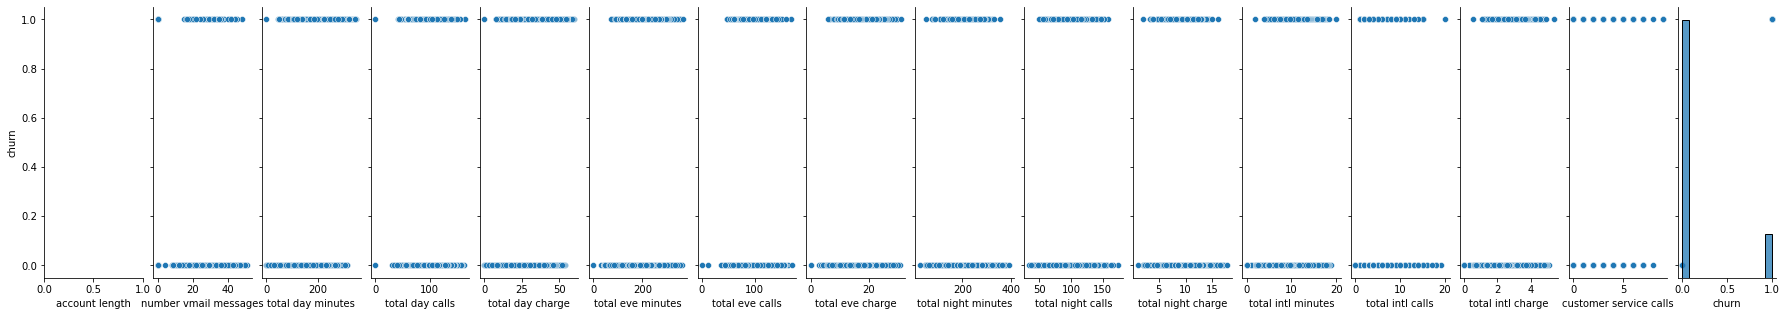

In [26]:
#Using a pair plot to explore linearity with our target. There doesn't seem to be much.
pair_plot = sns.pairplot(data=df_numeric,
                  y_vars=['churn'],
                  x_vars=df_numeric.columns)
pair_plot.fig.set_size_inches(25,5);

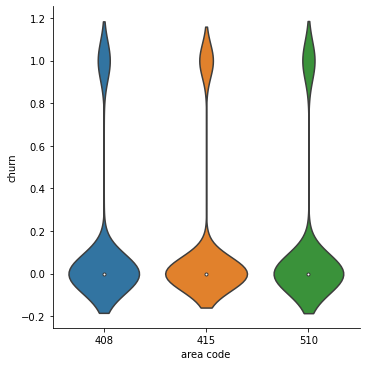

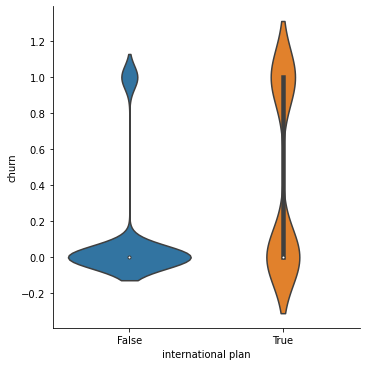

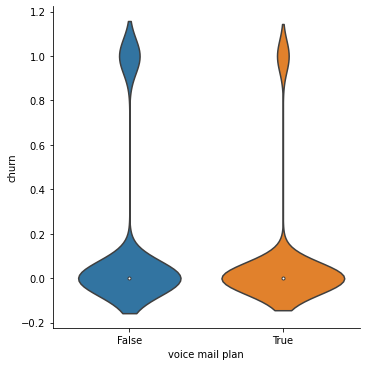

In [27]:
#Violin plots comparing our categorical features with our target
sns.catplot(x='area code',y='churn',data=df,kind="violin")
sns.catplot(x='international plan',y='churn',data=df,kind="violin")
sns.catplot(x='voice mail plan',y='churn',data=df,kind="violin");

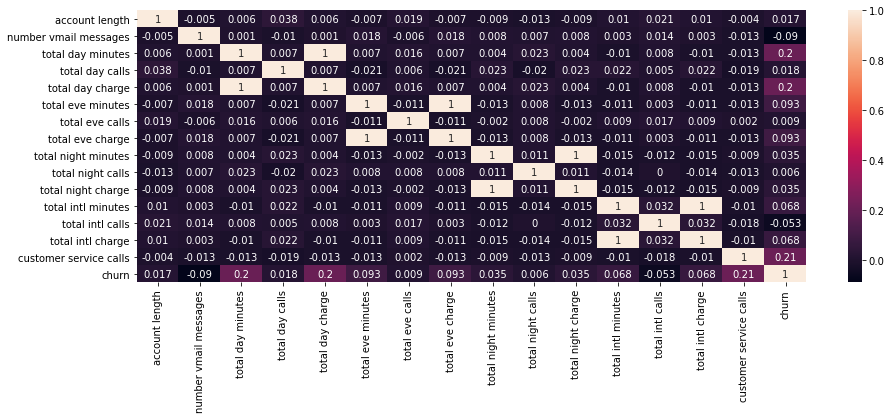

In [28]:
#There is no significant co-linearity between any of our numeric features
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_numeric.corr().round(decimals=3),annot=True);

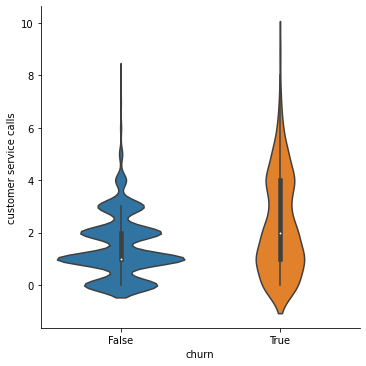

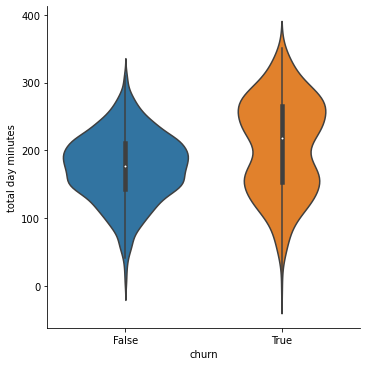

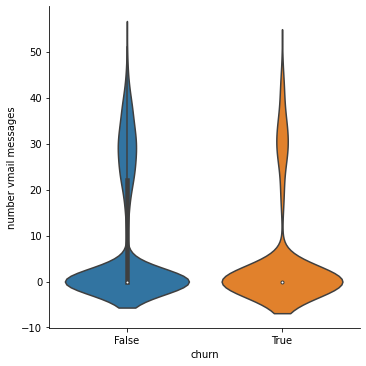

In [29]:
#Exploring possible correlation between numeric features and our target
sns.catplot(y='customer service calls',x='churn',data=df,kind="violin")
sns.catplot(y='total day minutes',x='churn',data=df,kind="violin")
sns.catplot(y='number vmail messages',x='churn',data=df,kind="violin");

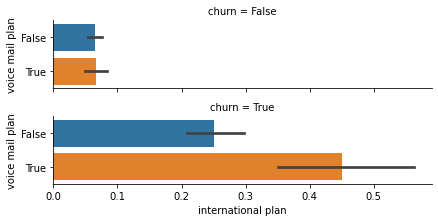

In [30]:
#The combination of voicemail pland and international plan seem have some cobination effect on churn
sns.catplot(y='voice mail plan',x='international plan', row="churn",
                kind="bar", orient="h", height=1.5, aspect=4,
                data=df);

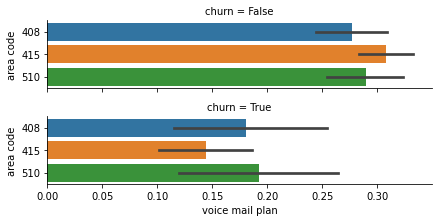

In [31]:
sns.catplot(y='area code',x='voice mail plan', row="churn",
                kind="bar", orient="h", height=1.5, aspect=4,
                data=df);

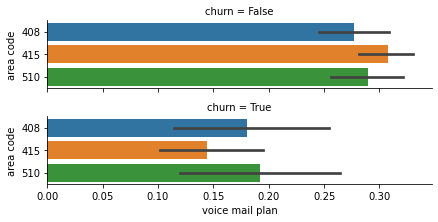

In [32]:
sns.catplot(y='area code',x='voice mail plan', row="churn",
                kind="bar", orient="h", height=1.5, aspect=4,
                data=df);

### 6. Locate any outliers
- There don't seem to be any outliers that will cause problems

### Visualizations

In [33]:
#Explore combination of churned and customer service calls
churn_by_cust_service_calls = pd.DataFrame(df.groupby(['customer service calls']).sum()['churn'])
churn_by_cust_service_calls["percentage_of_total_churn"] = (churn_by_cust_service_calls['churn'] /483 )
churn_by_cust_service_calls

,churn,percentage_of_total_churn
customer service calls,,
0,92,0.190476
1,122,0.252588
2,87,0.180124
3,44,0.091097
4,76,0.157350
5,40,0.082816
6,14,0.028986
7,5,0.010352
8,1,0.002070


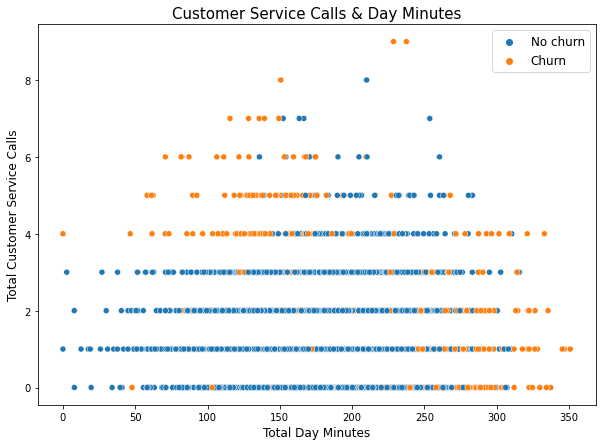

In [34]:
#There is a clear point at 4 customer service calls where a customer becomes a churn risk
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y=df["customer service calls"],x=df["total day minutes"],hue=df["churn"]);
ax.set_title("Customer Service Calls & Day Minutes",fontsize=15)
#Add legend and change text values
L = plt.legend(fontsize=12)
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

#Font and titles
plt.xlabel("Total Day Minutes",fontsize=12)
plt.ylabel("Total Customer Service Calls",fontsize=12)
plt.savefig('Visuals/Customer_Service_Calls_Day_Minutes')

In [2]:
#Model identifies red-flag customers and shows how to save them

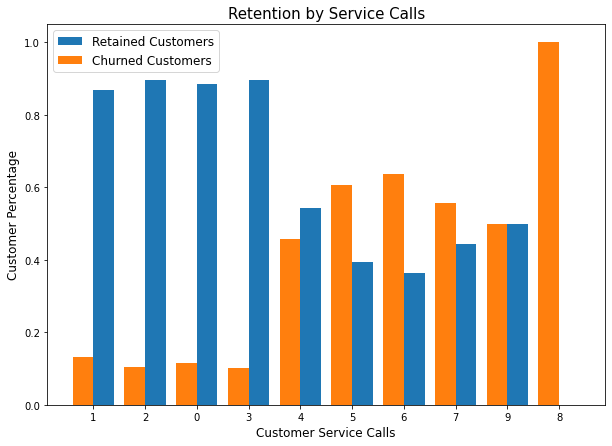

In [121]:
# Define Data
X = list(df['customer service calls'].value_counts().index)
Ychurn = list(df[df['churn']== True].groupby(['customer service calls']).count()['phone number'])
Zretained = list(df[df['churn']== False].groupby(['customer service calls']).count()['phone number'])
Zretained.append(0)

#Percentages
customers_by_cust_calls = np.array(df.groupby(['customer service calls']).count()['phone number'])
percent_churn = (np.array(Ychurn) / customers_by_cust_calls)
percent_non_churn = (np.array(Zretained) / customers_by_cust_calls)

x_axis = np.arange(len(X))

# Multi bar Chart
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(x_axis +0.2, percent_non_churn, width=0.4, label = 'Retained Customers')
plt.bar(x_axis -0.2, percent_churn, width=0.4, label = 'Churned Customers')

# Xticks

plt.xticks(x_axis, X)
# Add legend
plt.legend(fontsize=12)
#Axis labels
#titles
plt.title("Retention by Service Calls",fontsize=15)
plt.xlabel("Customer Service Calls",fontsize=12)
plt.ylabel("Customer Percentage",fontsize=12)
#Save figure
plt.savefig('Visuals/Retention_by_Service_Calls');

In [1]:
#Many customers service calls is a churn red-flag

### Save df to csv

In [ ]:
df.to_csv("data/cleaned_data.csv")

### Feature importances

In [43]:
!ls data

churn-in-telecoms-dataset.csv feature_importances.csv
cleaned_data.csv


In [44]:
fi_df = pd.read_csv("data/feature_importances.csv")

In [51]:
#rename our feature column
fi_df.rename(columns={'Unnamed: 0':'feature'},inplace=True)
#Drop all but the top 5 features
fi_df_top_5 = fi_df.head(5)
fi_df_top_5

,feature,feature importance
0,customer service calls,0.148352
1,total day minutes,0.137550
2,international plan,0.128560
3,total day charge,0.116849
4,total intl calls,0.044236


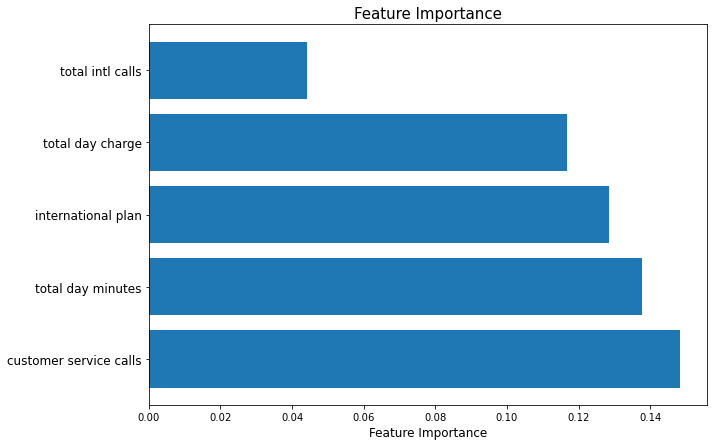

In [68]:
#Plot feature importance
fig, ax = plt.subplots(figsize=(10,7))
x = fi_df_top_5['feature']
height = fi_df_top_5['feature importance']

#h bar chart
ax.barh(x,height,)
#labels
plt.yticks(fontsize=12)
ax.set_xlabel('Feature Importance',fontsize=12)
#ax.set_ylabel('Features',fontsize=12)
ax.set_title('Feature Importance',fontsize=15)
plt.savefig('Visuals/Feature_Importance',bbox_inches='tight');